In [1]:
#goo.gl/zbVRKa

import pandas as pd


## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore - temp, humidity

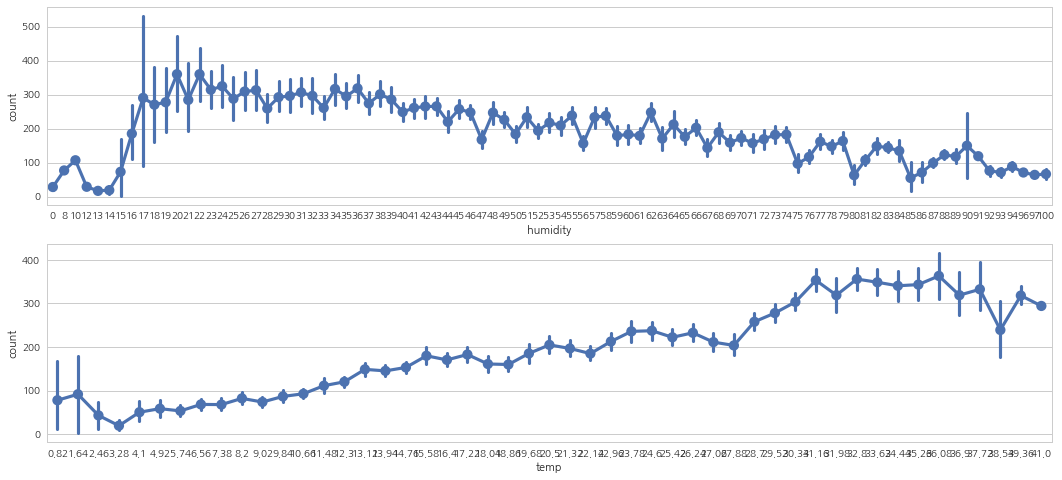

In [4]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="humidity", y="count",ax=ax1)
sns.pointplot(data=train, x="temp", y="count", ax=ax2)
#sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

 $Lesson Learned
   * 대체로 휴무에 상관없이 트렌드가 있다
        - 쌀쌀할때 - 근무날 더 많이 탄다
        - 더울 때 - 쉬는날 더 탄다        
   * humidity는 (극단으로 갈수록) 높을수록 안 탄다.- 반비례
   * temp는  (추울수록) 낮을수록 안 탄다.-비례


## Try

In [5]:
train["temp+humid/humid"]=(train["temp"]+train["humidity"])/(train["humidity"] + 1)
train[["temp+humid/humid","temp","humidity"]].head()

,temp+humid/humid,temp,humidity
0,1.107805,9.84,81
1,1.099012,9.02,80
2,1.099012,9.02,80
3,1.116316,9.84,75
4,1.116316,9.84,75


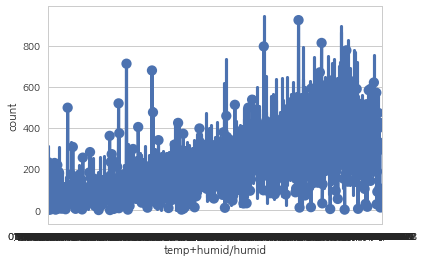

In [6]:
figure.set_size_inches(25, 10)
sns.pointplot(data=train, x="temp+humid/humid", y="count")

### Explore datetime

In [7]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


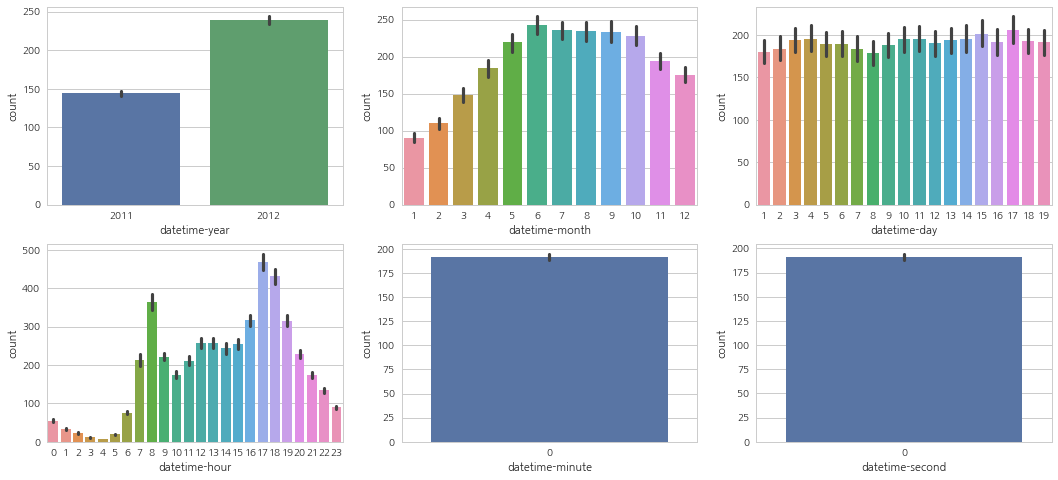

In [8]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday

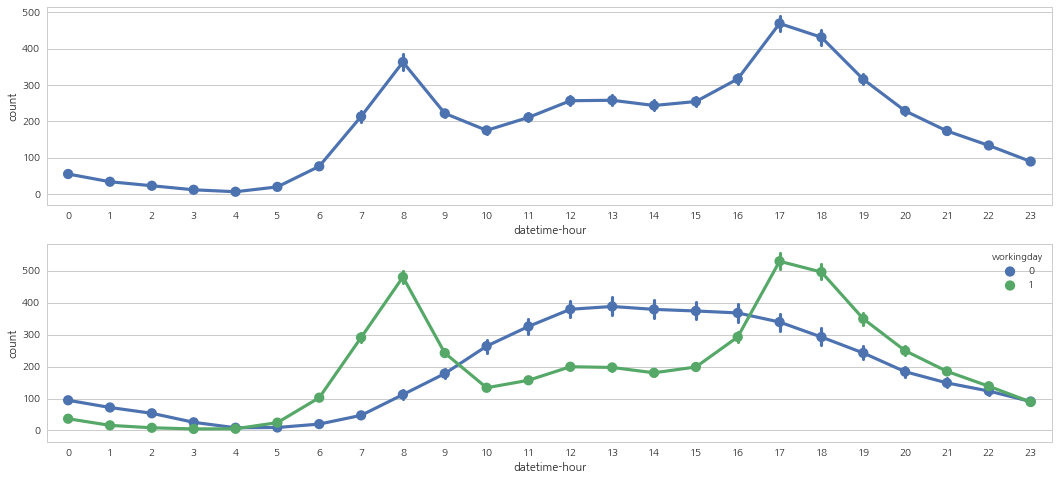

In [9]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [10]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 20)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


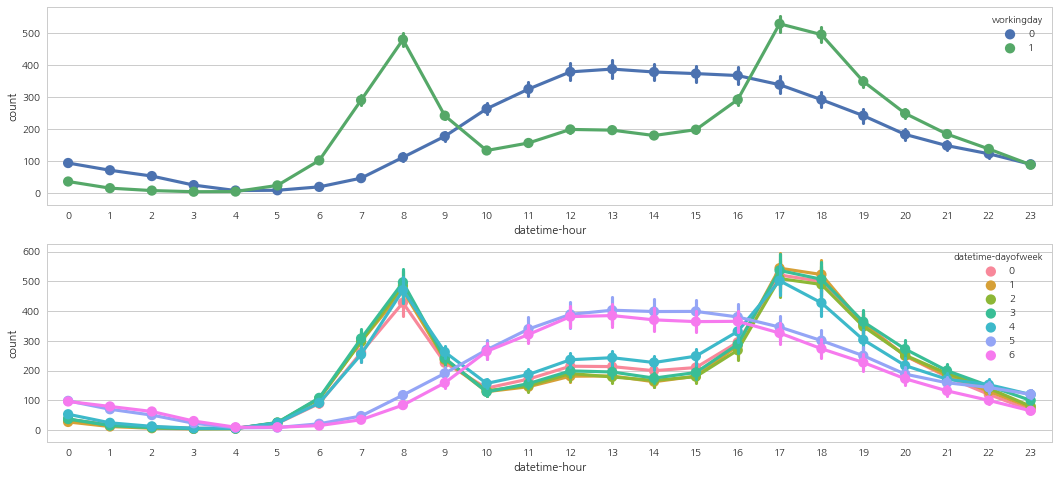

In [11]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

#금요일 컬럼 하나 더 만든다? working/holida금요일 컬럼 하나 더 만든다? working/holiday에 겹칠수있다
train["friday"]=train[train["datetime-dayofweek"]==5]
train["friday"].head()

## Explore holiday & working day 

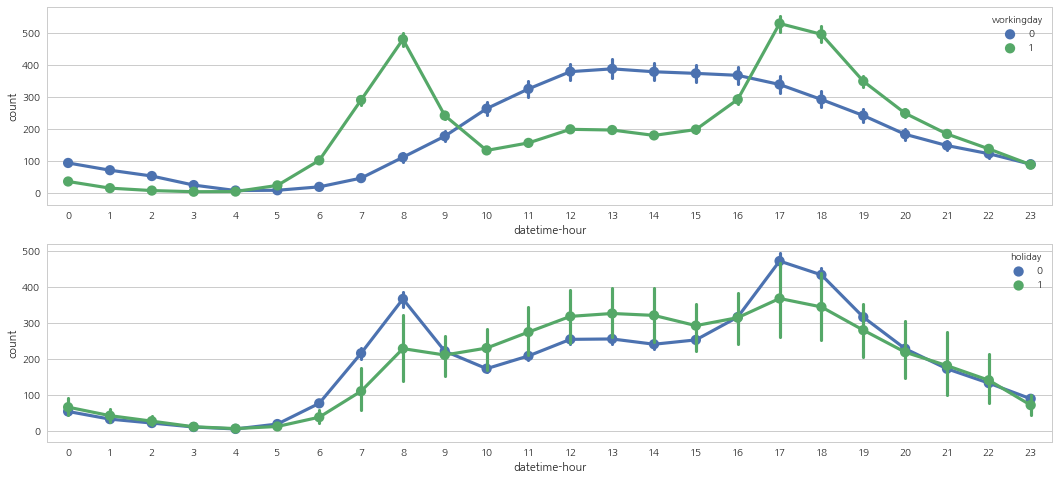

In [12]:
#perish=low_fare[low_fare["Survived"]==0]
#survived=low_fare[low_fare["Survived"]==1]

#sns.barplot(train["workingday"],hist=False,label="Perish")
#sns.barplot(train["workingday"],hist=False,label="Survived")

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="holiday", ax=ax2)

 ## Try
 데이터가 겹친다. 합쳐서 encoding .
 * working == 1 , holiday == 0
 * working == 1 , holiday == 1? 큰차이없는 그룹
 * working == 0 , holiday == 0
 * working == 0 , holiday == 1
 

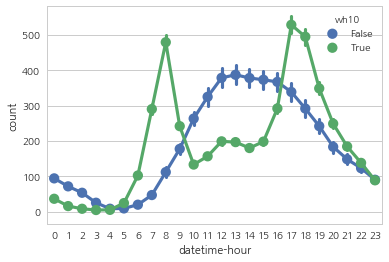

In [13]:
train["wh10"]= (train["workingday"]==1) & (train["holiday"]==0)
train["wh01"]= (train["workingday"]==0) & (train["holiday"]==1)
train["wh00"]= (train["workingday"]==0) & (train["holiday"]==0)
train["wh11"]= (train["workingday"]==1) & (train["holiday"]==1)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="wh10")

### Concatenate year and month

In [14]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 25)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


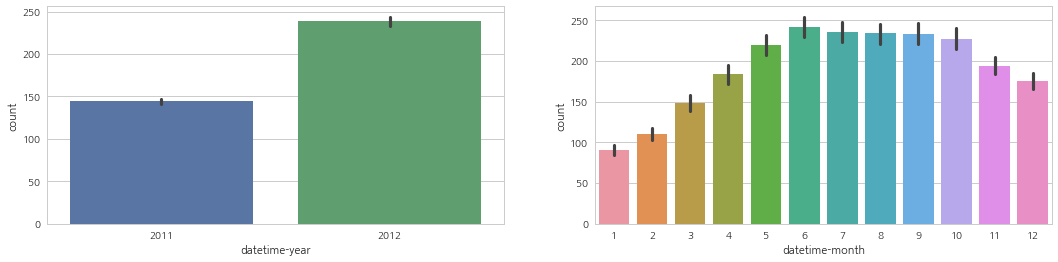

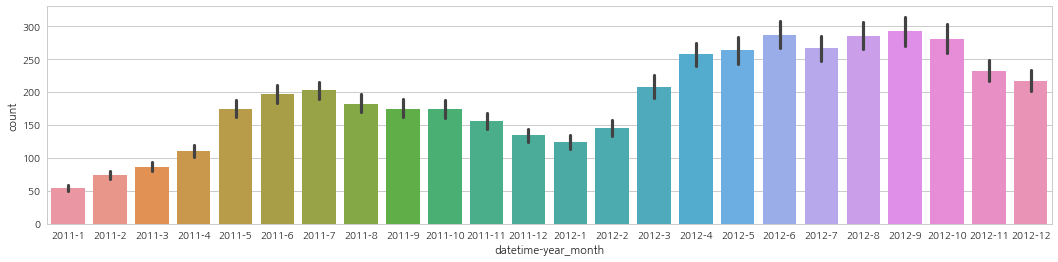

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

## Explore casual / register

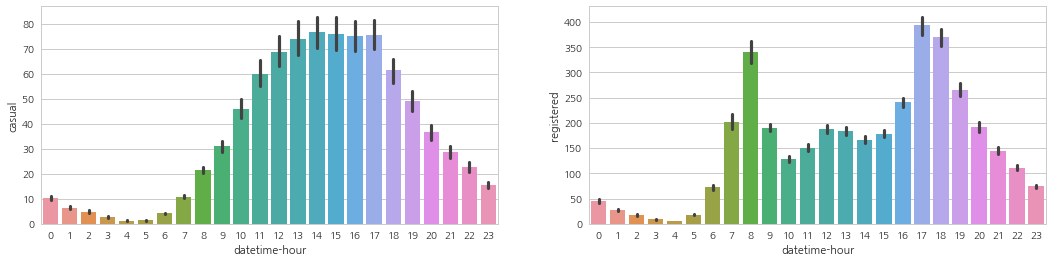

In [16]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train,x="datetime-hour", y="casual",ax=ax1)
#sns.lmplot(data=train,x="datetime-hour", y="count")

sns.barplot(data=train,x="datetime-hour", y="registered",ax=ax2)
#hue="datetime-year_month"  casual 	registered

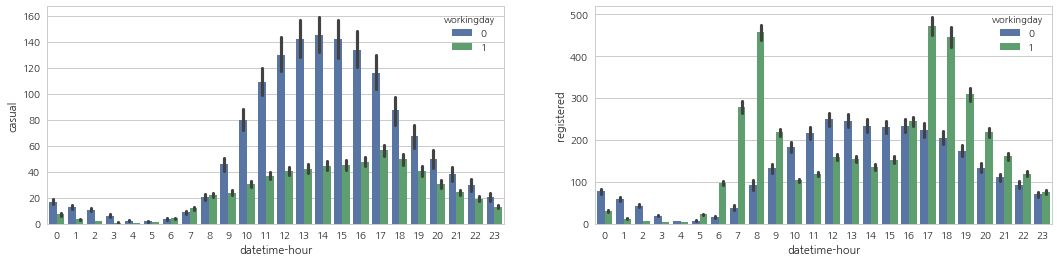

In [17]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train,x="datetime-hour", y="casual",hue="workingday", ax=ax1)
sns.barplot(data=train,x="datetime-hour", y="registered",hue="workingday", ax=ax2)

 Lesson Learned

  * 회원/비회원의 사용패턴이 눈에 띄게 다르다.
    - 회원: 휴무일에는 점심에, 근무일에는 출퇴근에
    - 비회원: 휴무일 늦은 아침, 근무일 이른 저녁 - 쉬는날 매우 큼.


## Reload Dataset

In [18]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse Datetime

In [20]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [21]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


### Concatenate year and month

In [22]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)
test["datetime-year_month"] = test["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()
test[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


### workingday/holiday 

In [23]:
train["wh10"]= (train["workingday"]==1) & (train["holiday"]==0)
train["wh01"]= (train["workingday"]==0) & (train["holiday"]==1)
train["wh00"]= (train["workingday"]==0) & (train["holiday"]==0)
train["wh11"]= (train["workingday"]==1) & (train["holiday"]==1)

In [24]:
test["wh10"]= (test["workingday"]==1) & (test["holiday"]==0)
test["wh01"]= (test["workingday"]==0) & (test["holiday"]==1)
test["wh00"]= (test["workingday"]==0) & (test["holiday"]==0)
test["wh11"]= (test["workingday"]==1) & (test["holiday"]==1)

### temp+humid/humid

In [25]:
train["temp+humid/humid"]=(train["temp"]+(train["humidity"] + 1))/(train["humidity"] + 1)
test["temp+humid/humid"]=(test["temp"]+(test["humidity"] + 1))/(test["humidity"] + 1)

## Train

In [1]:
feature_names = ["season", "wh01","wh10", "weather",
                 "temp", "atemp", "humidity",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'wh01',
 'wh10',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [2]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

NameError: name 'train' is not defined

In [28]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 13)


,season,wh11,wh01,wh10,wh00,weather,temp,atemp,humidity,temp+humid/humid,datetime-year,datetime-hour,datetime-dayofweek
0,1,False,False,True,False,1,10.66,11.365,56,1.187018,2011,0,3
1,1,False,False,True,False,1,10.66,13.635,56,1.187018,2011,1,3
2,1,False,False,True,False,1,10.66,13.635,56,1.187018,2011,2,3
3,1,False,False,True,False,1,10.66,12.880,56,1.187018,2011,3,3
4,1,False,False,True,False,1,10.66,12.880,56,1.187018,2011,4,3


In [29]:
# for column in list(train.columns) + ["casual", "registered"]:
#     print(column, train[train[column].isnull()].shape[0])

# train[train["temp+humid/humid"] == np.inf]

In [30]:
label_name1 = "registered"

y_train1 = train[label_name1]

print(y_train1.shape)
y_train1.head()
print(train[y_train1.isnull()==True].shape)

(10886,)
(0, 25)


In [31]:
label_name2 = "casual"
y_train2 = train[label_name2]

print(y_train2.shape)
y_train2.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestRegressor

# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# n_estimators
# max_depth
# max_features

model1 = RandomForestRegressor(n_estimators=300,
                              random_state=37,
                              n_jobs=-1)
model2 = RandomForestRegressor(n_estimators=300,
                              random_state=37,
                              n_jobs=-1)


## Score

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [33]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [34]:
from sklearn.cross_validation import cross_val_score

# # 'season',
#  'wh11',
#  'wh01',
#  'wh10',
#  'wh00',
#  'weather',
#  'temp',
#  'atemp',
#  'humidity',
#  'temp+humid/humid',
#  'datetime-year',
#  'datetime-hour',
#  'datetime-dayofweek'
score = cross_val_score(model1, X_train[["temp+humid/humid"]], y_train1, cv=3, \
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

# score = cross_val_score(model2, X_train, y_train2, cv=20, \
#                         scoring=rmsle_scorer).mean()

# print("Score = {0:.5f}".format(score))

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score = 1.42542


## Train

In [36]:
model1.fit(X_train, y_train1)
model2.fit(X_train, y_train2)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [39]:
predictions1 = model1.predict(X_test)


print(predictions1.shape)
predictions1

(6493,)


array([ 11.82      ,   5.8       ,   1.91166667, ...,  93.56333333,
        96.55888889,  44.03666667])

In [41]:
predictions2 = model2.predict(X_test)

print(predictions2.shape)
predictions2

(6493,)


array([ 2.34333333,  1.16333333,  1.31333333, ...,  4.38      ,
        3.84333333,  2.58333333])

## register+casaul

In [43]:
predictions=(predictions1+predictions2)

## Submit

In [44]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,14.163333
1,2011-01-20 01:00:00,6.963333
2,2011-01-20 02:00:00,3.225000
3,2011-01-20 03:00:00,2.797500
4,2011-01-20 04:00:00,2.393333


In [ ]:
submission.to_csv("beat-the-top-25.csv", index=False)